# Section 1: Data Exploration & Preprocessing

### using S&P 500 Stock Prices Dataset 
--- 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
stock_data = pd.read_csv('all_stocks_5yr.csv')
stock_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [4]:
stock_data.tail()

,date,open,high,low,close,volume,Name
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS
619039,2018-02-07,72.70,75.00,72.69,73.86,4534912,ZTS


In [5]:
stock_data.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [6]:
stock_data.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [7]:
stock_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [8]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [9]:
stock_data_numeric = stock_data.select_dtypes(include='number')
stock_data_numeric.head()

,open,high,low,close,volume
0,15.07,15.12,14.63,14.75,8407500
1,14.89,15.01,14.26,14.46,8882000
2,14.45,14.51,14.10,14.27,8126000
3,14.30,14.94,14.25,14.66,10259500
4,14.94,14.96,13.16,13.99,31879900


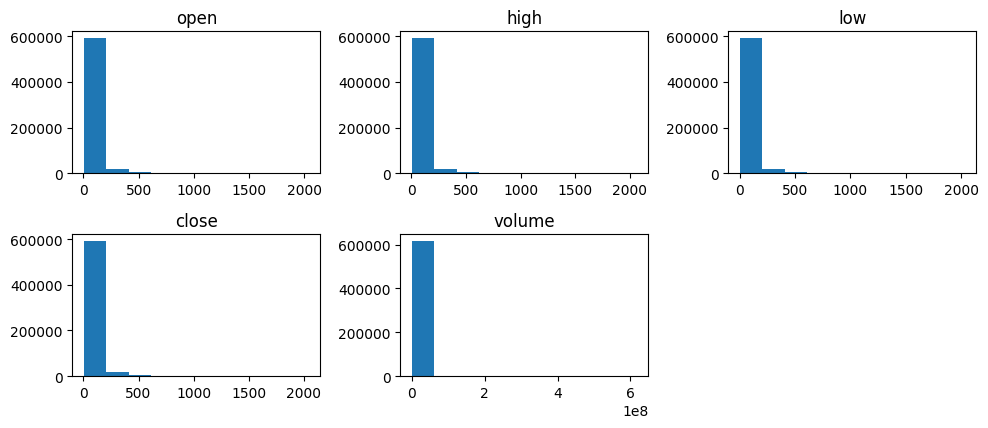

In [10]:
plt.figure(figsize=(10,6))
for i,col in enumerate(stock_data_numeric.columns):
    plt.subplot(3, 3, i+1)
    plt.hist(stock_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [11]:
stock_data['open'] = stock_data['open'].fillna(stock_data['open'].median())
stock_data['high'] = stock_data['high'].fillna(stock_data['high'].median())
stock_data['low'] = stock_data['low'].fillna(stock_data['low'].median)

In [12]:
stock_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

- Outliers
--- 

TypeError: unsupported operand type(s) for +: 'float' and 'method'

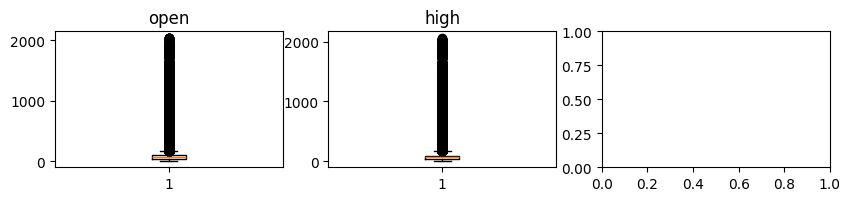

In [13]:
plt.figure(figsize=(10,6))
for i,col in enumerate(stock_data_numeric.columns):
    plt.subplot(3, 3, i+1)
    plt.boxplot(stock_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [15]:
def handling_outliers(columns):
    for i in columns:
        lower_quantitle = stock_data[i].quantile(.25)
        upper_quantitle = stock_data[i].quantile(.75)

        IQR = upper_quantitle - lower_quantitle

        lower_bound = lower_quantitle-1.5*IQR
        upper_bound = upper_quantitle+1.5*IQR

        stock_data[i] = np.where(stock_data[i]<lower_bound,lower_bound,stock_data[i])
        stock_data[i] = np.where(stock_data[i]>upper_bound,upper_bound,stock_data[i])
handling_outliers(stock_data_numeric)

TypeError: '<' not supported between instances of 'float' and 'method'

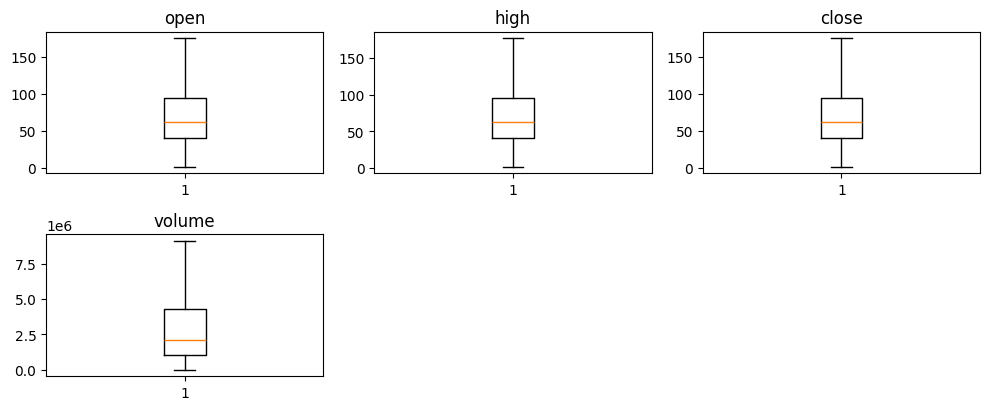

In [71]:
def boxplotting(stock_data_numeric):
    plt.figure(figsize=(10,6))
    for i, col in enumerate(stock_data_numeric.columns):
        plt.subplot(3, 3, i+1)
        plt.boxplot(stock_data[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()
boxplotting(stock_data_numeric)

- Correlation
--- 

In [74]:

# Compute Pearson correlation between numerical columns
correlation_matrix = stock_data_numeric[['open', 'high', 'low', 'close', 'volume']].corr(method='pearson')

# Display correlation matrix
print(correlation_matrix)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Stock Price Features")
plt.show()


KeyError: "['low'] not in index"

- Distribution of stock for closing price
--- 

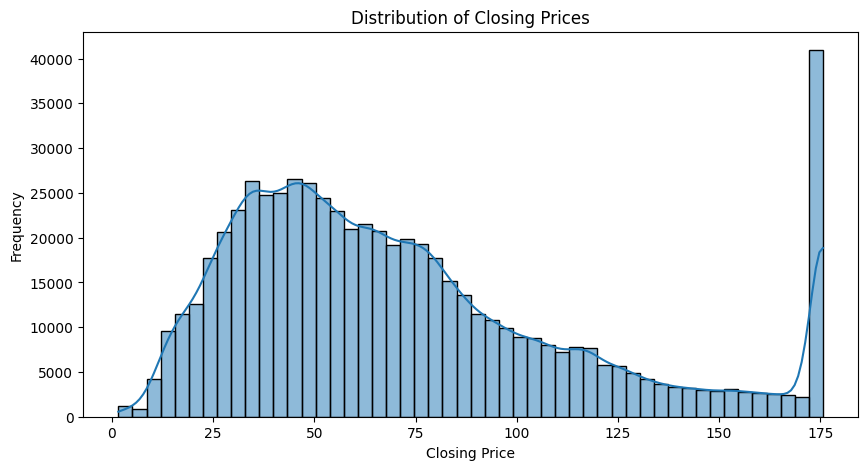

In [11]:
# closing price distribution
plt.figure(figsize=(10, 5))
sns.histplot(stock_data['close'], bins=50, kde=True)
plt.title("Distribution of Closing Prices")
plt.xlabel("Closing Price")
plt.ylabel("Frequency")
plt.show()

In [19]:
stock_sales = stock_data.groupby('date')['close'].sum().reset_index()
stock_sales['date'] = pd.to_datetime(stock_sales['date'])
stock_sales.set_index('date',inplace=True)
stock_sales.head()

,close
date,
2013-02-08,26361.0150
2013-02-11,26329.6075
2013-02-12,26389.0455
2013-02-13,26417.7075
2013-02-14,26399.2754


- Identifying Trend and Seasonality
--- 

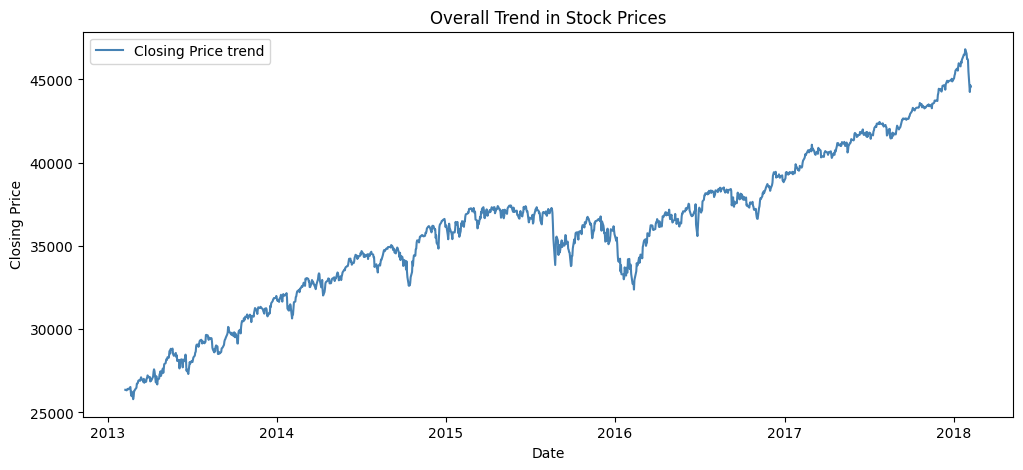

In [20]:
# Plot overall trend in average closing prices
plt.figure(figsize=(12, 5))
plt.plot(stock_sales["close"], label="Closing Price trend", color="steelblue")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Overall Trend in Stock Prices")
plt.legend()
plt.show()

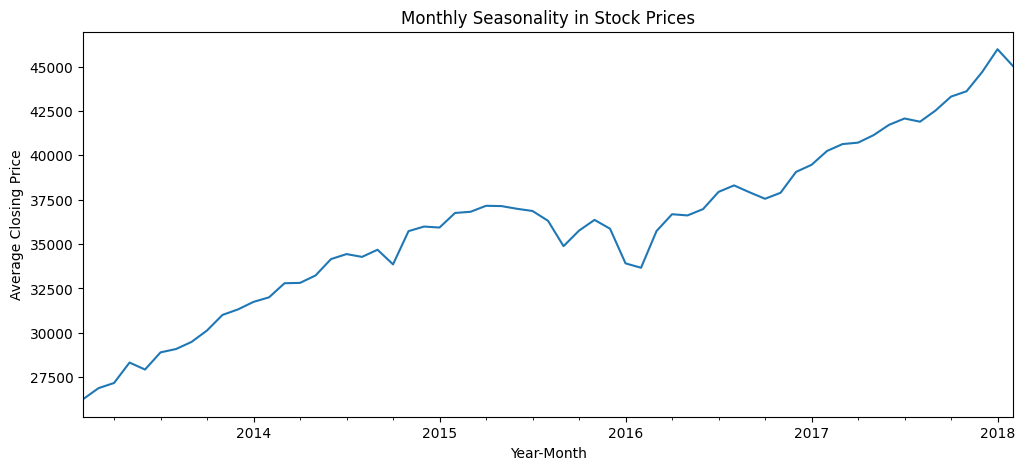

In [21]:

# Check for seasonality by analyzing monthly average closing prices
monthly_avg = stock_sales['close'].resample('ME').mean()  # Resample by month and compute mean

# Plot seasonality pattern
plt.figure(figsize=(12, 5))
monthly_avg.plot()
plt.xlabel("Year-Month")
plt.ylabel("Average Closing Price")
plt.title("Monthly Seasonality in Stock Prices")
plt.show()


- Autocorrection
--- 

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

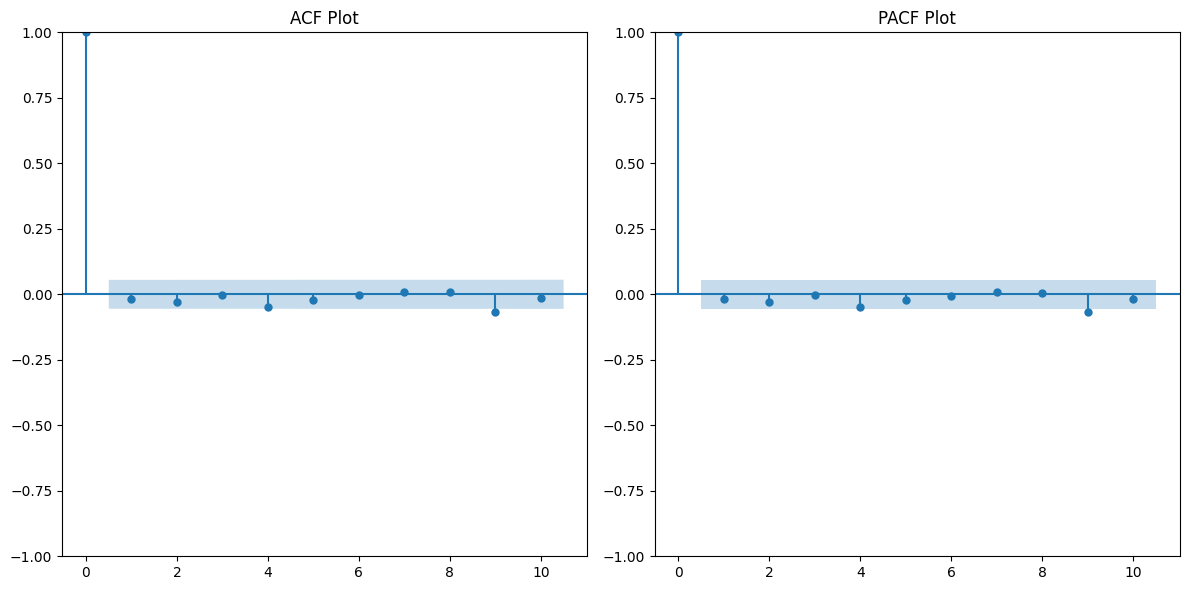

In [23]:

# Plot ACF and PACF
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_acf(stock_sales['close'].diff().dropna(), lags=10, ax=plt.gca())
plt.title('ACF Plot')

plt.subplot(1, 2, 2)
plot_pacf(stock_sales['close'].diff().dropna(), lags=10, ax=plt.gca())
plt.title('PACF Plot')

plt.tight_layout()
plt.show()

#vertical- correlation
#horizontal- lags (lags in shaded region is not statistically significant)

- Handling stationarity
--- 

In [24]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [25]:
# Performing the Augmented Dickey-Fuller test
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print("ADF Test Results:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"\t{key}: {value}")
    
    if result[1] < 0.05:
        print("\nConclusion: The series is stationary.")
    else:
        print("\nConclusion: The series is non-stationary.")

# Run ADF test on AirPassengers data
adf_test(stock_sales['close'])


ADF Test Results:
ADF Statistic: -1.1117356998398165
p-value: 0.7103692245657233
Critical Values:
	1%: -3.4355588184378574
	5%: -2.8638402312881497
	10%: -2.5679946684494275

Conclusion: The series is non-stationary.


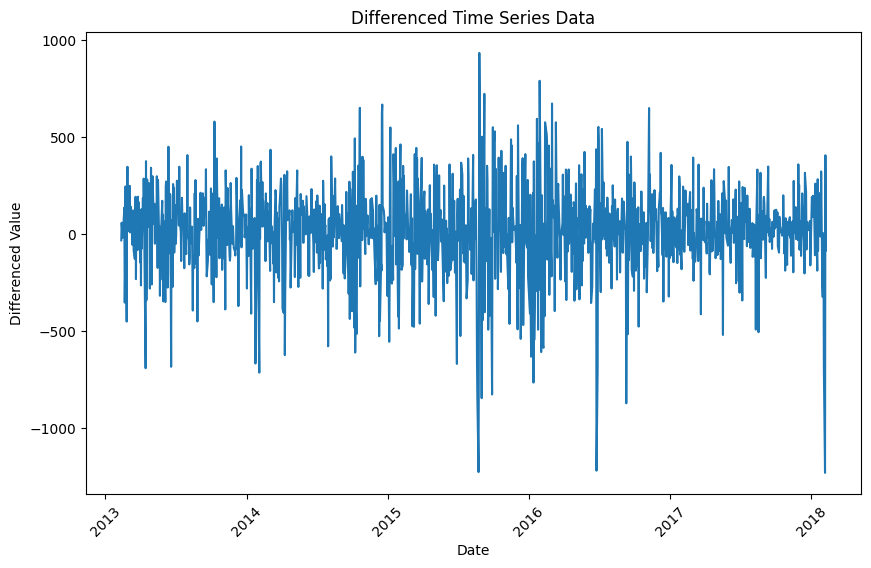

In [26]:
# Applying differencing
differenced_series =stock_sales.diff().dropna() # removes the first value (which is NaN)

# Visualize the differenced series
plt.figure(figsize=(10, 6))
plt.plot(differenced_series)
plt.title('Differenced Time Series Data')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Differenced Value')
plt.show()


- Time series Decompostion

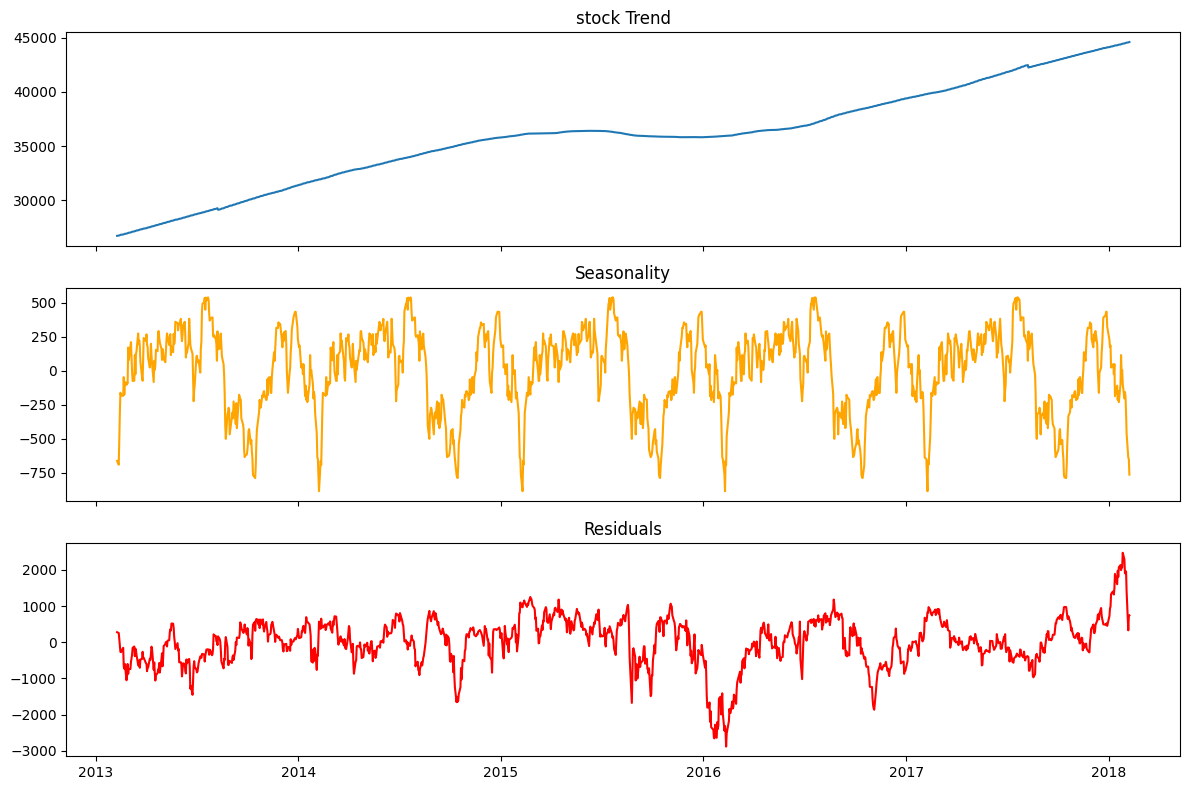

In [27]:
# Perform decomposition on the aggregated time series
decomposition = seasonal_decompose(stock_sales['close'], period=252, model='additive', extrapolate_trend='freq')

# Plot the decomposition results
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

axes[0].plot(stock_sales.index, decomposition.trend, label="Trend")
axes[0].set_title("stock Trend")

axes[1].plot(stock_sales.index, decomposition.seasonal, label="Seasonality", color='orange')
axes[1].set_title("Seasonality")

axes[2].plot(stock_sales.index, decomposition.resid, label="Residuals", color='red')
axes[2].set_title("Residuals")

plt.tight_layout()
plt.show()


In [29]:
# Create lag features (previous day's closing price)
stock_data['lag_1'] = stock_data['close'].shift(1)
stock_data['lag_7'] = stock_data['close'].shift(7)

# Create rolling mean features
stock_data['rolling_mean_7'] = stock_data['close'].rolling(window=7).mean()
stock_data['rolling_mean_30'] = stock_data['close'].rolling(window=30).mean()

# Drop NaN values generated by shifting/rolling
stock_data.dropna(inplace=True)

# Display the first few rows
print(stock_data.head())


          date   open   high    low  close     volume Name  lag_1  lag_7  \
29  2013-03-22  17.10  17.29  16.77  16.86  8545200.0  AAL  17.00  15.91   
30  2013-03-25  16.92  17.00  16.35  16.60  8400000.0  AAL  16.86  16.25   
31  2013-03-26  16.67  16.84  16.50  16.51  6898500.0  AAL  16.60  15.98   
32  2013-03-27  16.48  16.77  16.33  16.65  5537100.0  AAL  16.51  16.29   
33  2013-03-28  17.00  17.09  16.82  16.97  8324100.0  AAL  16.65  16.78   

    rolling_mean_7  rolling_mean_30  
29       16.627143        14.769333  
30       16.677143        14.831000  
31       16.752857        14.899333  
32       16.804286        14.978667  
33       16.831429        15.055667  


In [31]:
from sklearn.model_selection import train_test_split

In [37]:
#  sorting data by date before splitting
stock_sales = stock_sales.sort_index()
stock_sales

,date,open,high,low,close,volume,Name,lag_1,lag_7,rolling_mean_7,rolling_mean_30
29,2013-03-22,17.10,17.29,16.77,16.86,8545200.0,AAL,17.00,15.91,16.627143,14.769333
30,2013-03-25,16.92,17.00,16.35,16.60,8400000.0,AAL,16.86,16.25,16.677143,14.831000
31,2013-03-26,16.67,16.84,16.50,16.51,6898500.0,AAL,16.60,15.98,16.752857,14.899333
32,2013-03-27,16.48,16.77,16.33,16.65,5537100.0,AAL,16.51,16.29,16.804286,14.978667
33,2013-03-28,17.00,17.09,16.82,16.97,8324100.0,AAL,16.65,16.78,16.831429,15.055667
...,...,...,...,...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259.0,ZTS,76.73,77.59,78.535714,75.069333
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187.0,ZTS,77.82,78.33,78.314286,75.202000
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031.0,ZTS,76.78,79.25,77.540000,75.239333
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323.0,ZTS,73.83,80.09,76.565714,75.272333


In [35]:


# Defining the split index
train_size = int(len(differenced_series) * 0.8)

# Splitting the data
train_stock_data = stock_sales.iloc[:train_size]
test_stock_data = stock_sales.iloc[train_size:]

# Display the sizes
print(f"Training Data: {train_stock_data.shape}")
print(f"Testing Data: {test_stock_data.shape}")


Training Data: (1006, 11)
Testing Data: (618005, 11)


### Using New York City Energy Consumption Dataset
--- 

In [41]:
power_consumption = pd.read_csv('elec_city.csv')
power_consumption.head()

,tstp,energy(kWh/hh)
0,2011-11-23 09:00:00,0.284500
1,2011-11-23 09:30:00,0.280500
2,2011-11-23 10:00:00,0.153333
3,2011-11-23 10:30:00,0.098000
4,2011-11-23 11:00:00,0.110286


In [42]:
power_consumption['tstp'] = pd.to_datetime(power_consumption['tstp'])

In [96]:
power_consumption.tail()

,tstp,energy(kWh/hh)
39722,2014-02-27 22:00:00,0.299760
39723,2014-02-27 22:30:00,0.285163
39724,2014-02-27 23:00:00,0.252274
39725,2014-02-27 23:30:00,0.215284
39726,2014-02-28 00:00:00,0.208997


In [12]:
power_consumption.isnull().sum()

tstp              0
energy(kWh/hh)    0
dtype: int64

In [31]:
power_consumption.dtypes

tstp              datetime64[ns]
energy(kWh/hh)           float64
dtype: object

In [13]:
power_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39727 entries, 0 to 39726
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tstp            39727 non-null  datetime64[ns]
 1   energy(kWh/hh)  39727 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 620.9 KB


In [ ]:
# Summary statistics
power_consumption.describe()


,tstp,energy(kWh/hh)
count,39727,39727.000000
mean,2013-01-10 04:30:00,0.217170
min,2011-11-23 09:00:00,0.091800
25%,2012-06-17 06:45:00,0.162369
50%,2013-01-10 04:30:00,0.209297
75%,2013-08-05 02:15:00,0.260414
max,2014-02-28 00:00:00,0.479579
std,NaN,0.076554


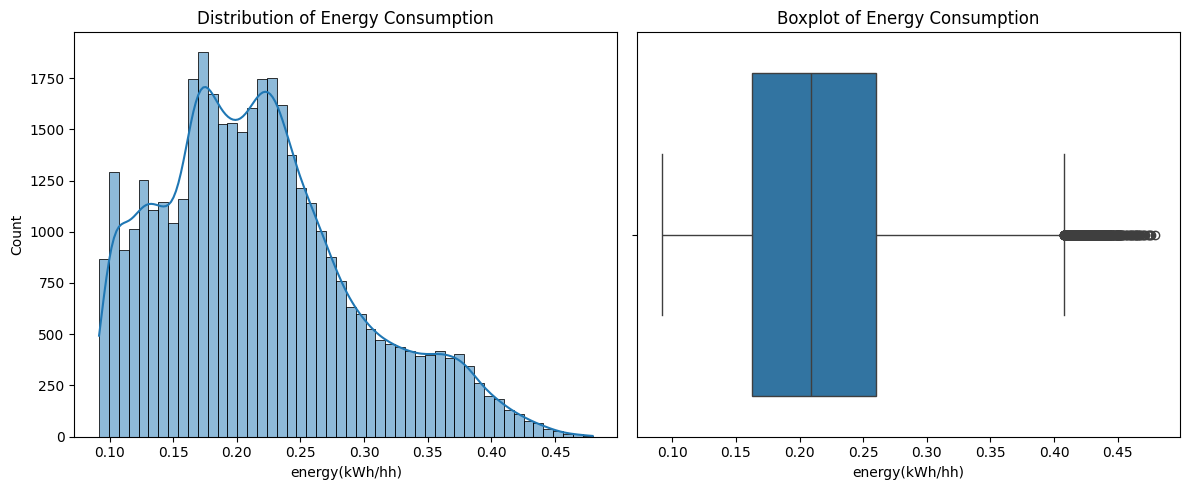

In [97]:

# Plot histogram and boxplot to identify outliers
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(power_consumption['energy(kWh/hh)'], bins=50, kde=True)
plt.title("Distribution of Energy Consumption")

plt.subplot(1, 2, 2)
sns.boxplot(x=power_consumption['energy(kWh/hh)'])
plt.title("Boxplot of Energy Consumption")

plt.tight_layout()
plt.show()



In [43]:
# Identify outliers using IQR method
Q1 = power_consumption['energy(kWh/hh)'].quantile(0.25)
Q3 = power_consumption['energy(kWh/hh)'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.4 * IQR


power_consumption_cleaned = power_consumption[(power_consumption['energy(kWh/hh)'] <= upper_bound)]



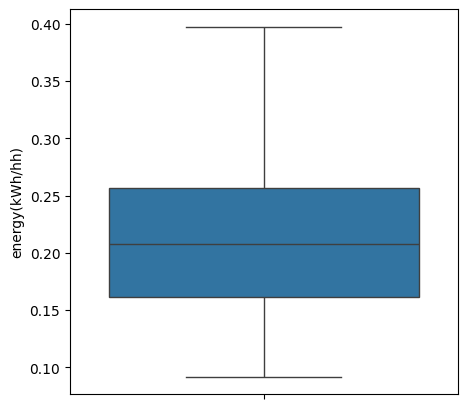

In [44]:
plt.figure(figsize=(5,5))
sns.boxplot(power_consumption_cleaned['energy(kWh/hh)'])
plt.show()

- Daily Seasonality
--- 

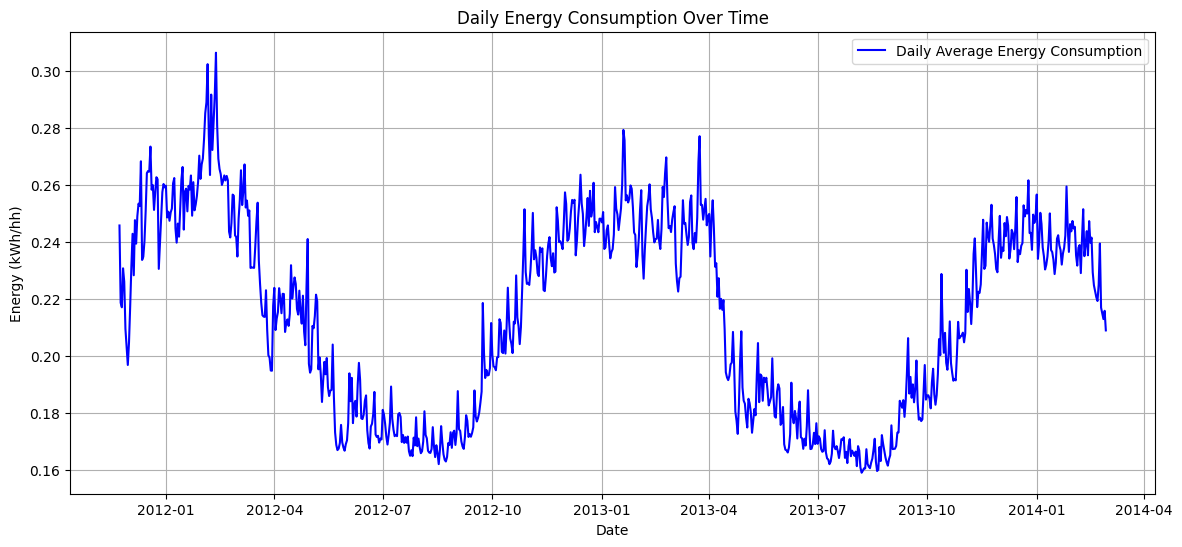

In [25]:

df_daily = power_consumption_cleaned.resample('D', on='tstp').mean()

# Plot the time series trend
plt.figure(figsize=(14, 6))
plt.plot(df_daily.index, df_daily['energy(kWh/hh)'], label='Daily Average Energy Consumption', color='blue')
plt.xlabel('Date')
plt.ylabel('Energy (kWh/hh)')
plt.title('Daily Energy Consumption Over Time')
plt.legend()
plt.grid(True)
plt.show()


- Hourly power consumption
--- 

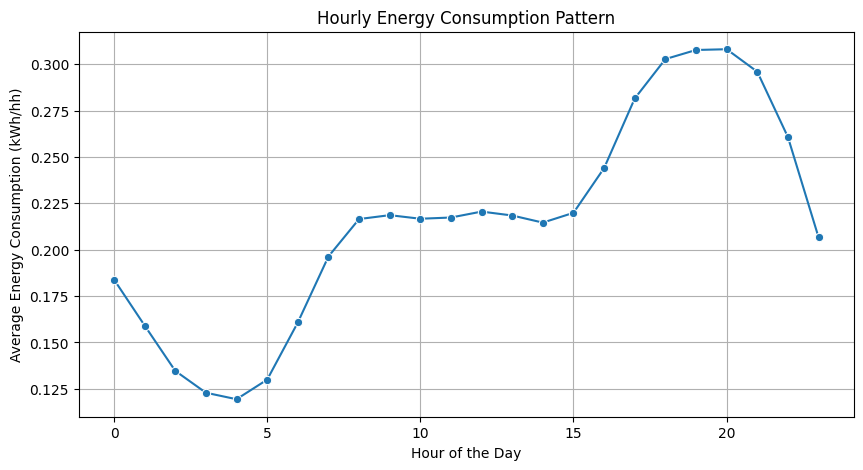

In [12]:
# Ensure we're working on a copy
power_consumption_cleaned = power_consumption_cleaned.copy()

# Extract hour safely
power_consumption_cleaned['hour'] = power_consumption_cleaned['tstp'].dt.hour

# Compute mean energy consumption by hour
hourly_avg = power_consumption_cleaned.groupby('hour')['energy(kWh/hh)'].mean()

# Plot daily seasonality pattern
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_avg.index, y=hourly_avg.values, marker='o')
plt.xlabel("Hour of the Day")
plt.ylabel("Average Energy Consumption (kWh/hh)")
plt.title("Hourly Energy Consumption Pattern")
plt.grid(True)
plt.show()


- Monthly Seansonality
--- 

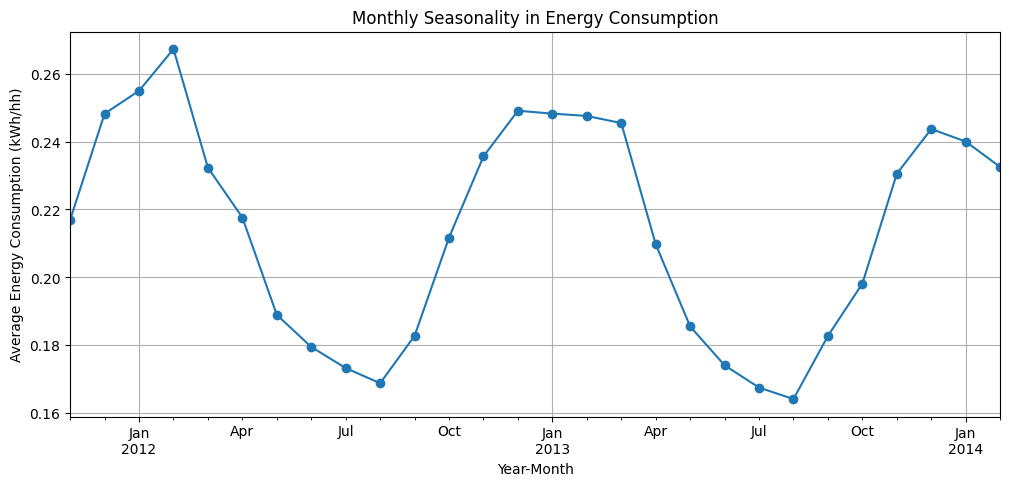

In [13]:
power_consumption_cleaned = power_consumption_cleaned.copy()
# Extract month and year
power_consumption_cleaned['year_month'] = power_consumption_cleaned['tstp'].dt.to_period('M')

# Compute average energy consumption per month
monthly_avg = power_consumption_cleaned.groupby('year_month')['energy(kWh/hh)'].mean()

# Plot monthly seasonality pattern
plt.figure(figsize=(12, 5))
monthly_avg.plot(marker='o', linestyle='-')
plt.xlabel("Year-Month")
plt.ylabel("Average Energy Consumption (kWh/hh)")
plt.title("Monthly Seasonality in Energy Consumption")
plt.grid(True)
plt.show()


- Power consumption trend
--- 

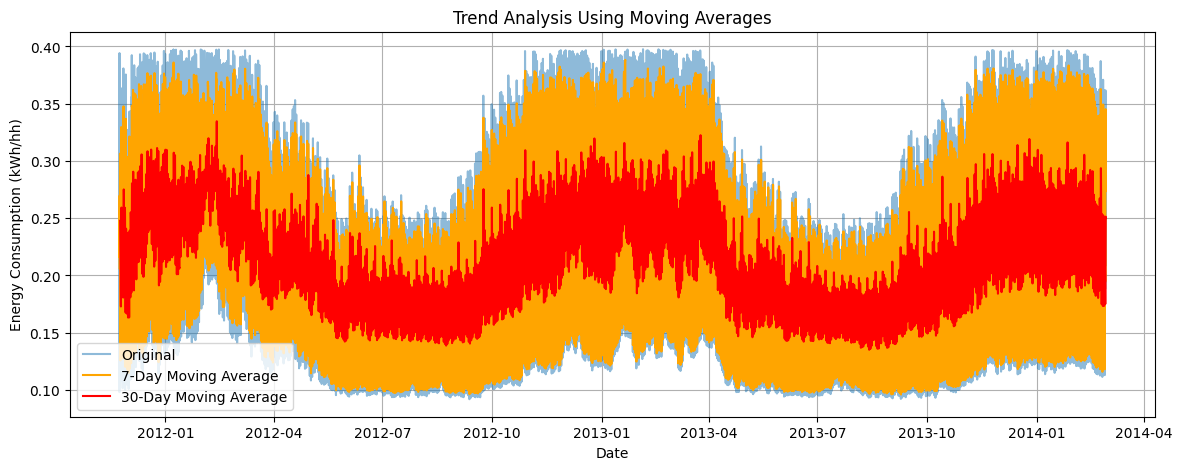

In [15]:
# Compute moving averages
power_consumption_cleaned['7d_MA'] = power_consumption_cleaned['energy(kWh/hh)'].rolling(window=7).mean()
power_consumption_cleaned['30d_MA'] = power_consumption_cleaned['energy(kWh/hh)'].rolling(window=30).mean()

# Plot trend with moving averages
plt.figure(figsize=(14, 5))
plt.plot(power_consumption_cleaned['tstp'], power_consumption_cleaned['energy(kWh/hh)'], label='Original', alpha=0.5)
plt.plot(power_consumption_cleaned['tstp'], power_consumption_cleaned['7d_MA'], label='7-Day Moving Average', color='orange')
plt.plot(power_consumption_cleaned['tstp'], power_consumption_cleaned['30d_MA'], label='30-Day Moving Average', color='red')

# Labels and title
plt.xlabel("Date")
plt.ylabel("Energy Consumption (kWh/hh)")
plt.title("Trend Analysis Using Moving Averages")
plt.legend()
plt.grid(True)
plt.show()


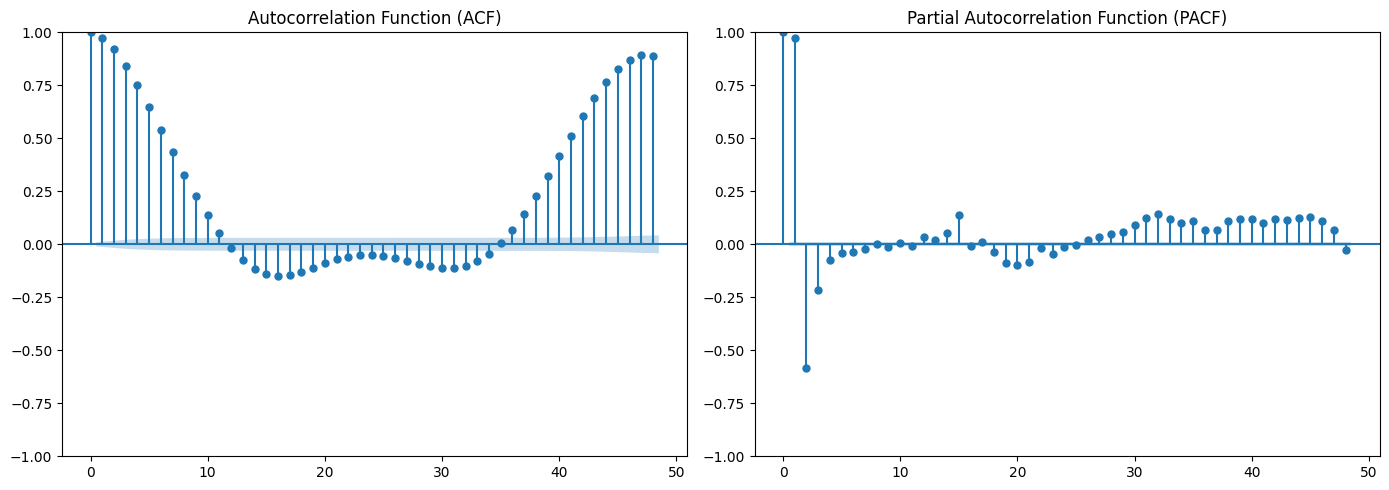

In [34]:
#set as index
power_consumption_cleaned.set_index('tstp', inplace=True)

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ACF plot
sm.graphics.tsa.plot_acf(power_consumption_cleaned['energy(kWh/hh)'], ax=axes[0], lags=48)
axes[0].set_title("Autocorrelation Function (ACF)")

# PACF plot
sm.graphics.tsa.plot_pacf(power_consumption_cleaned['energy(kWh/hh)'], ax=axes[1], lags=48)
axes[1].set_title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()


- Stationarity tests (ADF/KPSS)
--- 

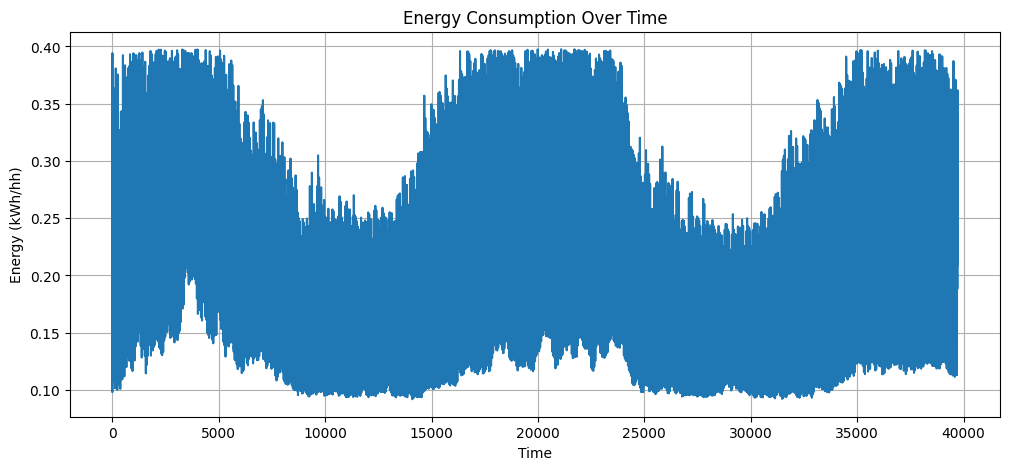

{'ADF Statistic': np.float64(-4.165540589030261), 'p-value': np.float64(0.0007532103069083496), 'Critical Values': {'1%': np.float64(-3.4305181640487357), '5%': np.float64(-2.8616143245879413), '10%': np.float64(-2.5668095606014867)}}
The time series is stationary (reject the null hypothesis).


In [101]:


# Plot the energy consumption over time
plt.figure(figsize=(12, 5))
plt.plot(power_consumption_cleaned.index, power_consumption_cleaned['energy(kWh/hh)'])
plt.title("Energy Consumption Over Time")
plt.xlabel("Time")
plt.ylabel("Energy (kWh/hh)")
plt.grid()
plt.show()

# Performing ADF test on the energy consumption column
adf_result = adfuller(power_consumption_cleaned['energy(kWh/hh)'])

# Extract results
adf_statistic = adf_result[0]
p_value = adf_result[1]
critical_values = adf_result[4]

# Print results
adf_output = {
    "ADF Statistic": adf_statistic,
    "p-value": p_value,
    "Critical Values": critical_values
}

print(adf_output)

# Determine stationarity
if p_value < 0.05:
    print("The time series is stationary (reject the null hypothesis).")
else:
    print("The time series is not stationary (fail to reject the null hypothesis).")


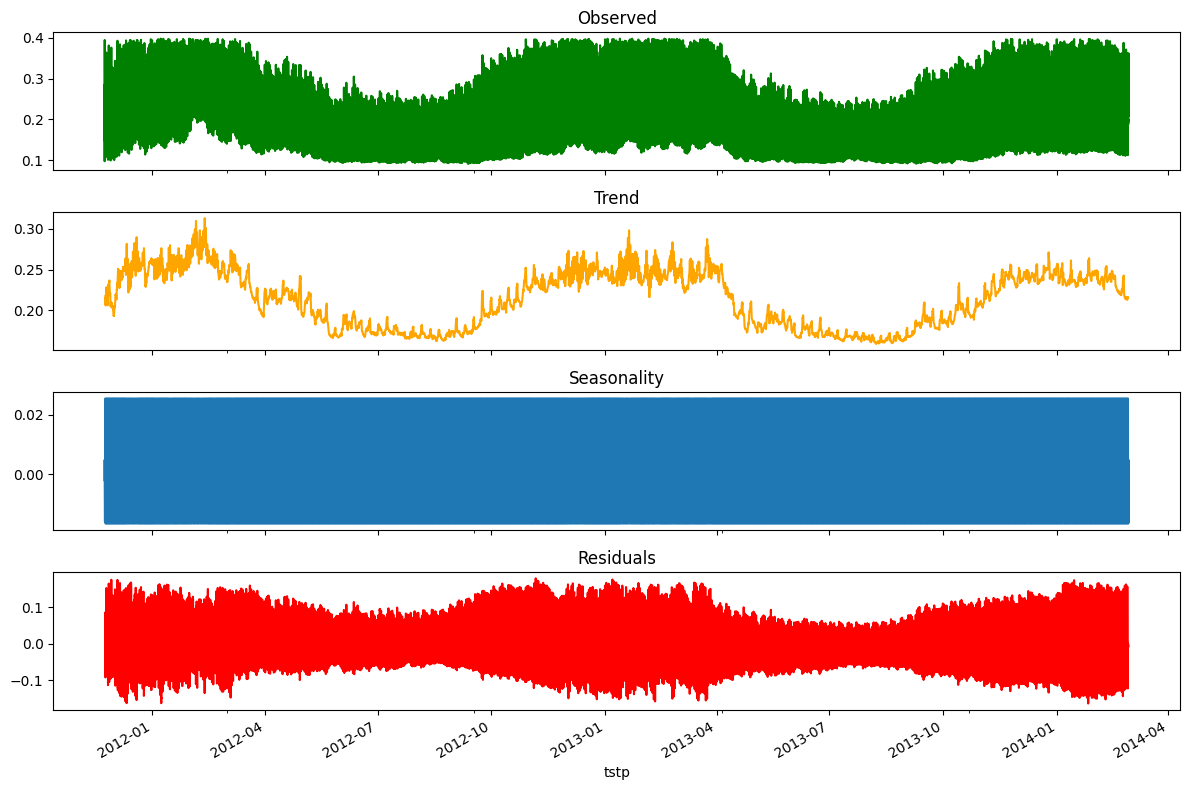

In [39]:
# Performing seasonal decomposition (assuming half-hourly data with a daily pattern)
from turtle import color


decomposition = seasonal_decompose(power_consumption_cleaned['energy(kWh/hh)'], model='additive', period=48)

# Plot the decomposition results
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

decomposition.observed.plot(ax=axes[0], legend=False, title='Observed',color='green')
decomposition.trend.plot(ax=axes[1], legend=False, title='Trend',color='orange')
decomposition.seasonal.plot(ax=axes[2], legend=False, title='Seasonality')
decomposition.resid.plot(ax=axes[3], legend=False, title='Residuals',color='red')

plt.tight_layout()
plt.show()


In [43]:


# Lagged values: Creating lagged features for 1 and 2 days
power_consumption_cleaned['lag_1'] = power_consumption_cleaned['energy(kWh/hh)'].shift(1)
power_consumption_cleaned['lag_2'] = power_consumption_cleaned['energy(kWh/hh)'].shift(2)

# Rolling mean: Calculate a rolling mean with a window size of 3
power_consumption_cleaned['rolling_mean_2'] = power_consumption_cleaned['energy(kWh/hh)'].rolling(window=2).mean()

# Optional: Rolling mean for other window sizes
power_consumption_cleaned['rolling_mean_7'] = power_consumption_cleaned['energy(kWh/hh)'].rolling(window=7).mean()

# Display the DataFrame with new features
print(power_consumption_cleaned)


                     energy(kWh/hh)     lag_1     lag_2  rolling_mean_7  \
tstp                                                                      
2011-11-23 09:00:00        0.284500       NaN       NaN             NaN   
2011-11-23 09:30:00        0.280500  0.284500       NaN             NaN   
2011-11-23 10:00:00        0.153333  0.280500  0.284500             NaN   
2011-11-23 10:30:00        0.098000  0.153333  0.280500             NaN   
2011-11-23 11:00:00        0.110286  0.098000  0.153333             NaN   
...                             ...       ...       ...             ...   
2014-02-27 22:00:00        0.299760  0.319743  0.334706        0.338006   
2014-02-27 22:30:00        0.285163  0.299760  0.319743        0.327073   
2014-02-27 23:00:00        0.252274  0.285163  0.299760        0.311915   
2014-02-27 23:30:00        0.215284  0.252274  0.285163        0.293098   
2014-02-28 00:00:00        0.208997  0.215284  0.252274        0.273704   

                     rol

C:\Users\joyaw\AppData\Local\Temp\ipykernel_3076\1637087408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  power_consumption_cleaned['lag_1'] = power_consumption_cleaned['energy(kWh/hh)'].shift(1)
C:\Users\joyaw\AppData\Local\Temp\ipykernel_3076\1637087408.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  power_consumption_cleaned['lag_2'] = power_consumption_cleaned['energy(kWh/hh)'].shift(2)
C:\Users\joyaw\AppData\Local\Temp\ipykernel_3076\1637087408.py:6: SettingWithCopyWarning: 
A value is trying

In [102]:
power_consumption_cleaned.shape

(38944, 2)

In [46]:


# Defining the split index
train_size = int(len(power_consumption_cleaned) * 0.8)

# Splitting the data
train_data = power_consumption_cleaned.iloc[:train_size]
test_data = power_consumption_cleaned.iloc[train_size:]

# Display the sizes
print(f"Training Data: {train_data.shape}")
print(f"Testing Data: {test_data.shape}")


Training Data: (31155, 2)
Testing Data: (7789, 2)


## Why stationarity is important in time
--- 

With Stationarity, the time series data is assumed to constant for variance, covariance and mean and here’s why it’s important:

 **Predictability of Future Values**:
   - **Stationary** time series data have properties (such as mean, variance, and autocovariance) that do not change over time. This makes the series more predictable, as patterns in the data remain consistent over time.

 **Assumption of Statistical Models**:
   - Many time series models, such as **Autoregressive Integrated Moving Average (ARIMA)**, **Exponential Smoothing**, and **GARCH** models, assume that the time series is stationary. These models rely on the assumption that the data’s statistical properties do not change over time.

**Stationary Time Series are Easier to Model**:
   - When a series is stationary, the model’s behavior remains consistent over time, which simplifies the process of fitting the model. 

 **Statistical Inference**:
   - Statistical tests and hypothesis tests for time series often require stationarity because these tests depend on the assumption that the data are consistent over time. 
  

When applying **ARIMA** (AutoRegressive Integrated Moving Average) models to time series data, non-stationary data can lead to several issues. ARIMA models are designed to work with stationary data, and when the data is non-stationary, it may not behave as expected, leading to inaccurate results. Here's a breakdown of how non-stationary data impacts ARIMA models:

   - **ARIMA models** assume that the data is stationary, which means that the statistical properties (mean, variance, autocovariance) of the time series do not change over time. 
   - If the data is non-stationary, the model’s underlying assumptions are violated, leading to unreliable parameter estimates and poor forecasting performance. components(paramters) of the ARIMA model assume that the relationships between past and current values of the time series are stable over time. Non-stationary data (e.g., data with trends or changing variances) disturbs these relationships, making the estimated parameters of the AR and MA terms inaccurate. (the “I” in ARIMA) is used to remove non-stationarity, such as trends. However, if this step is not performed properly, the ARIMA model may not capture the true underlying structure of the data, leading to poor forecasting performance.

   -  If the time series has a trend (e.g., increasing or decreasing over time), this violates the assumption of stationarity, causing the ARIMA model to overfit to the trend and fail to model the actual fluctuations properly.
     - The ARIMA model would try to fit a trend component that doesn't exist in the underlying data (e.g., overfitting to the long-term growth or decline), leading to poor out-of-sample forecasting.
   - If the data has seasonality (i.e., repeating patterns at fixed intervals), ARIMA models might fail to capture this seasonal component if it's not made stationary.

For stock price, seasonality appears to be a factor since at the beginning of every year there's a rise in the stock price

For electricity consumption, the data shows stationarity thus making seasonality not a major factor

# Section 2: Statistical Forecasting

##### using stock data
--- 

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

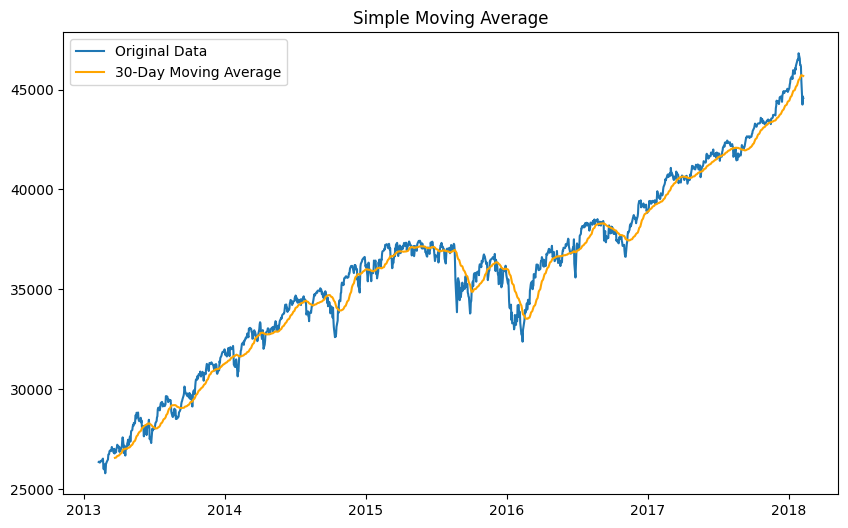

In [ ]:


# Calculate Simple Moving Average with a window of 30 days
window_size = 30
stock_sales['SMA'] = stock_sales['close'].rolling(window=window_size).mean()

# Plot original data and moving average
plt.figure(figsize=(10, 6))
plt.plot(stock_sales['close'], label='Original Data')
plt.plot(stock_sales['SMA'], label=f'{window_size}-Day Moving Average', color='orange')
plt.legend()
plt.title('Simple Moving Average')
plt.show()


In [ ]:
'''Holt-Winters is an extension of SES that can model data with both trend and seasonality. 
It has three components: level, trend, and seasonality. 
The method adjusts the level and trend over time while also adjusting for seasonal patterns.'''


# Applying Holt-Winters Exponential Smoothing (Additive Seasonality)
hw_model = ExponentialSmoothing(stock_sales['close'], trend='add', seasonal='add', seasonal_periods=7).fit()

# Get the fitted values
stock_sales['Holt-Winters'] = hw_model.fittedvalues

# Plot original data and Holt-Winters
plt.figure(figsize=(10, 6))
plt.plot(stock_sales['close'], label='Original Data')
plt.plot(stock_sales['Holt-Winters'], label='Holt-Winters Exponential Smoothing', color='purple')
plt.legend()
plt.title('Holt-Winters Exponential Smoothing (Additive Seasonality)')
plt.show()


##### using enegry consumption
--- 

C:\Users\joyaw\AppData\Local\Temp\ipykernel_3076\1075313988.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  power_consumption_cleaned['SMA'] = power_consumption_cleaned['energy(kWh/hh)'].rolling(window=window_size).mean()


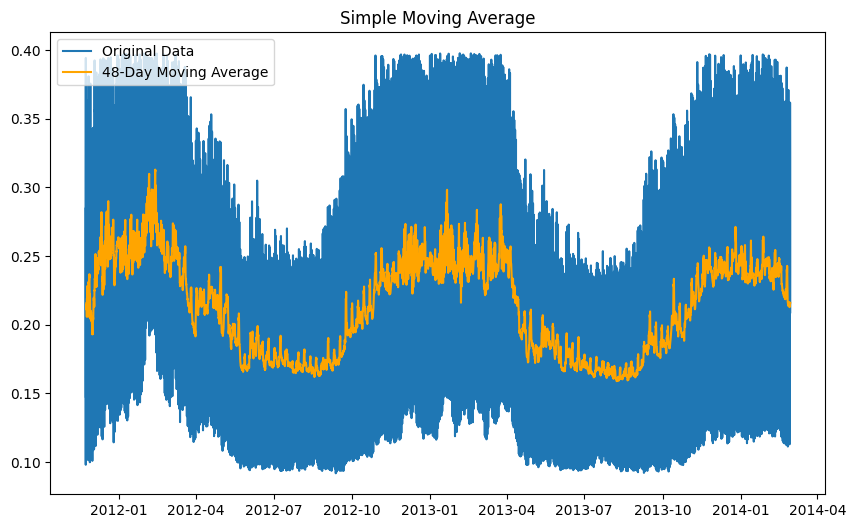

In [ ]:


# Calculate Simple Moving Average with a window of 30 days
window_size = 48
power_consumption_cleaned['SMA'] = power_consumption_cleaned['energy(kWh/hh)'].rolling(window=window_size).mean()

# Plot original data and moving average
plt.figure(figsize=(10, 6))
plt.plot(power_consumption_cleaned['energy(kWh/hh)'], label='Original Data')
plt.plot(power_consumption_cleaned['SMA'], label=f'{window_size}-Day Moving Average', color='orange')
plt.legend()
plt.title('Simple Moving Average')
plt.show()


C:\Users\joyaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\joyaw\AppData\Local\Temp\ipykernel_3076\3463231967.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  power_consumption_cleaned['SES'] = ses_model.fittedvalues


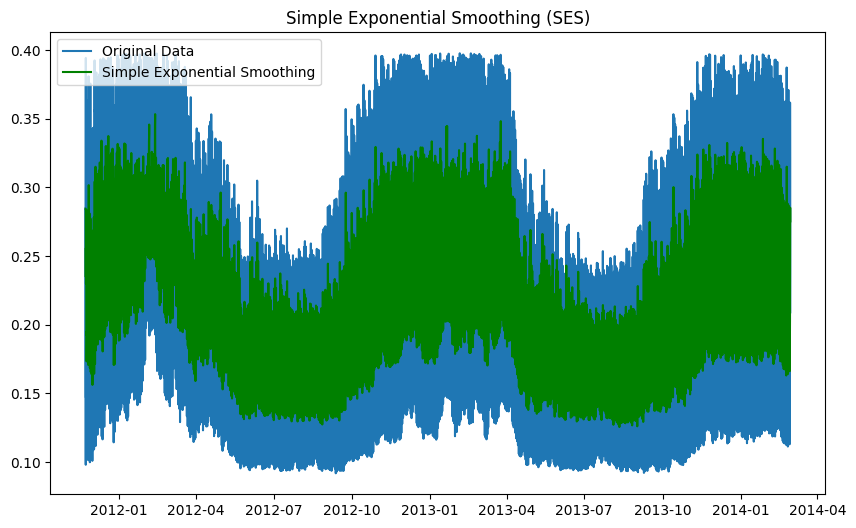

In [ ]:
'''used for forecasting when the time series data has no trend or seasonality. 
It calculates weighted averages of past observations, 
where the weights decrease exponentially as the observations get older
A smaller(smoothing_level) value makes the model smoother and less responsive to recent changes, 
while a larger value gives more weight to the most recent data
'''

# Apply Simple Exponential Smoothing
ses_model = SimpleExpSmoothing(power_consumption_cleaned['energy(kWh/hh)']).fit(smoothing_level=0.1, optimized=False)

# Get the smoothed values
power_consumption_cleaned['SES'] = ses_model.fittedvalues

# Plot original data and SES
plt.figure(figsize=(10, 6))
plt.plot(power_consumption_cleaned['energy(kWh/hh)'], label='Original Data')
plt.plot(power_consumption_cleaned['SES'], label='Simple Exponential Smoothing', color='green')
plt.legend()
plt.title('Simple Exponential Smoothing (SES)')
plt.show()


In [15]:
import itertools
import warnings
from statsmodels.tsa.arima.model import ARIMA

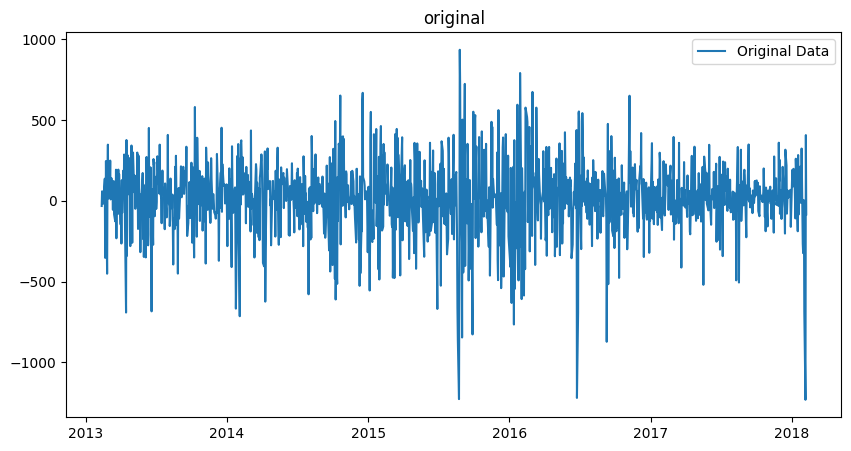

In [89]:
plt.figure(figsize=(10, 5))
plt.plot(differenced_series, label='Original Data')
plt.legend()
plt.title("original")
plt.show()

##### obtaining pdq for both datasets
--- 

In [97]:
warnings.filterwarnings("ignore")

# Defining p, d, q range for ARIMA Grid Search
p = q = range(0, 4)  
d = [1]  

# Generating all possible combinations of p, d, q
pdq_combinations = list(itertools.product(p, d, q))

# Grid Search to find the best ARIMA model
best_aic = float("inf")
best_bic = float("inf")
best_pdq_aic = None
best_pdq_bic = None
best_model_aic = None
best_model_bic = None

for pdq in pdq_combinations:
    try:
        model = ARIMA(differenced_series['close'], order=pdq)
        model_fit = model.fit()
        
        # Compare AIC and BIC
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_pdq_aic = pdq
            best_model_aic = model_fit
        
        if model_fit.bic < best_bic:
            best_bic = model_fit.bic
            best_pdq_bic = pdq
            best_model_bic = model_fit

    except:
        continue

print(f"Best ARIMA(p, d, q) by AIC: {best_pdq_aic} with AIC={best_aic}")
print(f"Best ARIMA(p, d, q) by BIC: {best_pdq_bic} with BIC={best_bic}")



Best ARIMA(p, d, q) by AIC: (0, 1, 1) with AIC=17275.86873009608
Best ARIMA(p, d, q) by BIC: (0, 1, 1) with BIC=17286.159122366076


In [38]:
#The best (p, d, q) values
best_pdq = (0, 1, 1) 

# Fit the ARIMA model
model = ARIMA(train_stock_data['close'], order=best_pdq)
model_fit = model.fit()



C:\Users\joyaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\joyaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\joyaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [39]:
steps=30
forecast_values = model_fit.forecast(steps=steps)
test_values = test_stock_data['close'][:steps] 
forecast_values.head()

C:\Users\joyaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\joyaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


1006    39722.191331
1007    39722.191331
1008    39722.191331
1009    39722.191331
1010    39722.191331
Name: predicted_mean, dtype: float64

In [40]:


# Actual values (replace with the true values corresponding to forecast)
actual_values = stock_sales['close'].iloc[-30:].values

# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(actual_values, forecast_values))
print(f"RMSE: {rmse}")

# MAE (Mean Absolute Error)
mae = mean_absolute_error(actual_values, forecast_values)
print(f"MAE: {mae}")

# MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((actual_values - forecast_values) / actual_values)) * 100
print(f"MAPE: {mape}%")



RMSE: 5996.789714999454
MAE: 5960.0687190059725
MAPE: 13.028410725679882%


In [129]:
warnings.filterwarnings("ignore")

# Defining p, d, q range for ARIMA Grid Search
p = q = range(0, 4)  
d = [0]  

# Generating all possible combinations of p, d, q
pdq_combinations = list(itertools.product(p, d, q))

# Grid Search to find the best ARIMA model
best_aic = float("inf")
best_bic = float("inf")
best_pdq_aic = None
best_pdq_bic = None
best_model_aic = None
best_model_bic = None

for pdq in pdq_combinations:
    try:
        model = ARIMA(power_consumption_cleaned['energy(kWh/hh)'], order=pdq)
        model_fit = model.fit()
        
        # Compare AIC and BIC
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_pdq_aic = pdq
            best_model_aic = model_fit
        
        if model_fit.bic < best_bic:
            best_bic = model_fit.bic
            best_pdq_bic = pdq
            best_model_bic = model_fit

    except:
        continue

print(f"Best ARIMA(p, d, q) by AIC: {best_pdq_aic} with AIC={best_aic}")
print(f"Best ARIMA(p, d, q) by BIC: {best_pdq_bic} with BIC={best_bic}")



Best ARIMA(p, d, q) by AIC: (2, 0, 3) with AIC=-229047.74015924224
Best ARIMA(p, d, q) by BIC: (2, 0, 3) with BIC=-228987.75099927172


In [45]:
#The best (p, d, q) values
best_pdq = (2, 0, 3) 

# Fit the ARIMA model
model = ARIMA(train_data['energy(kWh/hh)'], order=best_pdq)
model_fit = model.fit()

NameError: name 'train_data' is not defined

In [112]:
steps=30
forecast_values = model_fit.forecast(steps=steps)

C:\Users\joyaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\joyaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [113]:

# Actual values (replace with the true values corresponding to forecast)
actual_values = power_consumption_cleaned['energy(kWh/hh)'].iloc[-steps:].values

# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(actual_values, forecast_values))
print(f"RMSE: {rmse}")

# MAE (Mean Absolute Error)
mae = mean_absolute_error(actual_values, forecast_values)
print(f"MAE: {mae}")

# MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((actual_values - forecast_values) / actual_values)) * 100
print(f"MAPE: {mape}%")


RMSE: 0.0783027544286709
MAE: 0.06389393256201084
MAPE: 23.621478053129426%


- forecast for next 30days
--- 

|  feature                 |        ARIMA                   |Exponential           |
|--------------------------|--------------------------------|----------------------|
|  Model Structure         |Combines autoregression, differencing, and moving averages.|Uses weighted averages of past values
|  Stationarity Requirement| Requires the data to be stationary or made stationary through differencing.|Can handle both stationary and non-stationary series, especially with trend and seasonality.                                
|  Trend & Seasonality     |Can model both trend and seasonality if SARIMA is used.|Can model trend and seasonality using Holt-Winters.
|  Complexity              |More complex due to model parameters (AR, I, MA) and requires careful identification of p, d, q.|Simpler to implement, requires fewer parameters and hyperparameters to tune.
|  Model Fit               |Requires the estimation of more parameters and model diagnostics.|Easier to fit, particularly with fewer parameters and no diagnostic checking required.
|  Forecast Horizon        |Effective for medium to long-term forecasts, especially when data has complex patterns.|Generally better for short-term forecasts, especially if the data is highly volatile.

### When to Prefer ARIMA ###
Stationary data with trend: When the data is stationary or can be made stationary by differencing, and there’s a clear trend over time.

Complex relationships: When the time series has significant autocorrelation and the relationships between past values and future values are complex.

No clear seasonality: ARIMA can handle trends well, but if there is no obvious seasonal pattern, it might be preferred over Exponential Smoothing.

Longer-term forecasting: ARIMA is effective for making medium- to long-term forecasts, especially when there are complex underlying relationships.


### When to Prefer Exponential Smoothing ###
Data with trend and/or seasonality: If your data exhibits a clear trend or seasonality, especially when seasonality repeats annually or on a fixed schedule.

Short-term forecasting: Exponential smoothing models, particularly the Holt-Winters method, are often used for short-term forecasting, as they give more weight to the recent observations, making them responsive to recent changes.

Simplicity and computational efficiency: When you need a simple model without the need for extensive parameter tuning and diagnostics. It's also computationally less expensive compared to ARIMA.

### Real-World Example ###
Example : ARIMA in Financial Data
Scenario: You are forecasting the price of a stock over the next few months. The stock exhibits clear long-term trends (e.g., increasing value due to business growth or market conditions), but no seasonality.



### What Causes Large Errors ###
If ARIMA produces large forecasting errors, potential causes include:

- Incorrect Differencing (d):Under-differencing: The data still has a trend, causing ARIMA to miss long-term movements.

- Over-differencing: Too many differences can remove valuable information, making predictions noisy.

- Wrong (p, q) Values:If p and q are not correctly tuned, the model may not capture autocorrelations effectively.AIC/BIC should be used to select the best parameters.

- High Volatility or Non-Stationary Residuals:If residuals are autocorrelated or heteroskedastic (changing variance over time), ARIMA may not fit well.

- Seasonal Patterns Ignored:If the time series has a seasonal pattern (e.g., monthly or yearly fluctuations), a standard ARIMA model will not perform well. SARIMA (Seasonal ARIMA) should be used instead.


### How to Improve an ARIMA Model ###
##### Check Stationarity ####
- Use Augmented Dickey-Fuller (ADF) test to confirm stationarity.
- Apply differencing (d) if the data is non-stationary.

##### Optimize (p, d, q) Selection #####
- Use grid search with AIC/BIC criteria to find the best parameters.
- Use Auto-ARIMA (pmdarima) to automate selection.

##### Analyze Residuals #####
- If residuals show autocorrelation, adjust p or q.
- Ensure residuals are normally distributed with constant variance.

##### Consider SARIMA for Seasonality #####
- If seasonality is present, use SARIMA (Seasonal ARIMA) instead of ARIMA.

##### Use Exogenous Variables (ARIMAX) or Machine Learning #####
- If external factors influence the data, try ARIMAX (ARIMA with regressors).
- Hybrid models like LSTM + ARIMA can work for complex datasets.

# Section 3: Machine Learning Forecasting

##### Converting time series data into ML-ready format
--- 

In [114]:

from pandas.tseries.holiday import USFederalHolidayCalendar


In [115]:
stock_data['date'] = pd.to_datetime(stock_data['date'])
stock_data.set_index('date', inplace=True)

In [116]:
stock_data['month'] = stock_data.index.month
stock_data["day_of_week"] = stock_data.index.dayofweek  

# Get US Federal Holidays
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start=stock_data.index.min(), end=stock_data.index.max())

# Mark if the date is a holiday
stock_data["is_holiday"] = stock_data.index.isin(holidays).astype(int)
stock_data.head()


,open,high,low,close,volume,Name,month,day_of_week,is_holiday
date,,,,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500.000,AAL,2,4,0
2013-02-11,14.89,15.01,14.26,14.46,8882000.000,AAL,2,0,0
2013-02-12,14.45,14.51,14.10,14.27,8126000.000,AAL,2,1,0
2013-02-13,14.30,14.94,14.25,14.66,9105792.375,AAL,2,2,0
2013-02-14,14.94,14.96,13.16,13.99,9105792.375,AAL,2,3,0


In [117]:
def create_lagged_features(stock_data, target_col="close", lags=10):
    for i in range(1, lags+1):
        stock_data[f"lag_{i}"] = stock_data[target_col].shift(i)
    return stock_data

stock_data = create_lagged_features(stock_data, target_col="close", lags=10)
stock_data.dropna(inplace=True) 
print(stock_data.head())


             open   high    low  close       volume Name  month  day_of_week  \
date                                                                           
2013-02-25  13.60  13.76  13.00  13.02  7186400.000  AAL      2            0   
2013-02-26  13.14  13.42  12.70  13.26  9105792.375  AAL      2            1   
2013-02-27  13.28  13.62  13.18  13.41  7390500.000  AAL      2            2   
2013-02-28  13.49  13.63  13.39  13.43  6143600.000  AAL      2            3   
2013-03-01  13.37  13.95  13.32  13.61  7376800.000  AAL      3            4   

            is_holiday  lag_1  lag_2  lag_3  lag_4  lag_5  lag_6  lag_7  \
date                                                                      
2013-02-25           0  13.57  13.37  13.33  14.26  14.50  13.99  14.66   
2013-02-26           0  13.02  13.57  13.37  13.33  14.26  14.50  13.99   
2013-02-27           0  13.26  13.02  13.57  13.37  13.33  14.26  14.50   
2013-02-28           0  13.41  13.26  13.02  13.57  13.37  13.33

In [118]:
stock_data["rolling_mean_7"] = stock_data["close"].rolling(window=7).mean()
stock_data["rolling_std_7"] = stock_data["close"].rolling(window=7).std()
stock_data.dropna(inplace=True)  
print(stock_data.head())


             open   high    low  close       volume Name  month  day_of_week  \
date                                                                           
2013-03-05  14.01  14.05  13.71  14.05  7676100.000  AAL      3            1   
2013-03-06  14.52  14.68  14.25  14.57  9105792.375  AAL      3            2   
2013-03-07  14.70  14.93  14.50  14.82  9105792.375  AAL      3            3   
2013-03-08  14.99  15.20  14.84  14.92  9105792.375  AAL      3            4   
2013-03-11  14.85  15.15  14.71  15.13  6961800.000  AAL      3            0   

            is_holiday  lag_1  ...  lag_3  lag_4  lag_5  lag_6  lag_7  lag_8  \
date                           ...                                             
2013-03-05           0  13.90  ...  13.43  13.41  13.26  13.02  13.57  13.37   
2013-03-06           0  14.05  ...  13.61  13.43  13.41  13.26  13.02  13.57   
2013-03-07           0  14.57  ...  13.90  13.61  13.43  13.41  13.26  13.02   
2013-03-08           0  14.82  ...  14.

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

##### stock data
--- 

  preparing data

In [120]:
''''Why Use random_state=42?
 If you are sharing code with others or revisiting your analysis, 
using a fixed random_state ensures that the training and test sets remain the same. 
This is especially important for comparing results or debugging.'''

# Drop 'Name' and any non-numeric columns
stock_data.drop(columns=["Name"], errors="ignore", inplace=True)

# Define features (X) and target (y)
X = stock_data.drop(columns=["close"]) 
y = stock_data["close"]  

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling data (important for Linear Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


- Train Linear regression
--- 

In [121]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions
lr_predictions = lr_model.predict(X_test_scaled)

# Evaluate model
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
lr_r2 = r2_score(y_test, lr_predictions)

print(f"Linear Regression -> MAE: {lr_mae}, RMSE: {lr_rmse}, R²: {lr_r2}")


Linear Regression -> MAE: 6.512734071778136e-14, RMSE: 8.413777144960486e-14, R²: 1.0


- Train Random forest
--- 

In [122]:
# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate model
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)

print(f"Random Forest -> MAE: {rf_mae}, RMSE: {rf_rmse}, R²: {rf_r2}")


Random Forest -> MAE: 0.2858590839074256, RMSE: 0.4369045261020281, R²: 0.9998995676637681


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

   Hyperparameter Tuning for Linear Regression

In [ ]:
# Define parameter grid
ridge_params = {"alpha": [0.01, 0.1, 1, 10, 100]}

# Perform Grid Search
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring="neg_mean_squared_error")
ridge_grid.fit(X_train_scaled, y_train)

# Get best model
best_ridge = ridge_grid.best_estimator_

# Evaluate model
ridge_predictions = best_ridge.predict(X_test_scaled)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))
ridge_r2 = r2_score(y_test, ridge_predictions)

print(f"Best Ridge Regression -> Alpha: {ridge_grid.best_params_['alpha']}, RMSE: {ridge_rmse}, R²: {ridge_r2}")


   Hyperparameter Tuning for Random Forest

In [ ]:
# Define parameter grid
rf_params = {
    "n_estimators": [30, 60, 90],  # Number of trees
    "max_depth": [10, 20, None],  # Tree depth
    "min_samples_split": [2, 5, 10],  # Minimum samples to split a node
    "min_samples_leaf": [1, 2, 4],  # Minimum samples per leaf node
}

# Perform Grid Search
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=3, scoring="neg_mean_squared_error", n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Get best model
best_rf = rf_grid.best_estimator_

# Evaluate model
rf_predictions = best_rf.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)

print(f"Best Random Forest -> Params: {rf_grid.best_params_}, RMSE: {rf_rmse}, R²: {rf_r2}")


##### Energy consumption
--- 

preparing data

In [ ]:
# Define features (X) and target (y)
X = power_consumption_cleaned.drop(columns=['energy(kWh/hh)']) 
y = power_consumption_cleaned['energy(kWh/hh)']  

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling data (important for Linear Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train linear regression

In [ ]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions
lr_predictions = lr_model.predict(X_test_scaled)

# Evaluate model
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
lr_r2 = r2_score(y_test, lr_predictions)

print(f"Linear Regression -> MAE: {lr_mae}, RMSE: {lr_rmse}, R²: {lr_r2}")


Train Random forest

In [ ]:
# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate model
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)

print(f"Random Forest -> MAE: {rf_mae}, RMSE: {rf_rmse}, R²: {rf_r2}")


Hyperparameter tunning linear regression

In [ ]:
# Define parameter grid
ridge_params = {"alpha": [0.01, 0.1, 1, 10, 100]}

# Perform Grid Search
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring="neg_mean_squared_error")
ridge_grid.fit(X_train_scaled, y_train)

# Get best model
best_ridge = ridge_grid.best_estimator_

# Evaluate model
ridge_predictions = best_ridge.predict(X_test_scaled)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))
ridge_r2 = r2_score(y_test, ridge_predictions)

print(f"Best Ridge Regression -> Alpha: {ridge_grid.best_params_['alpha']}, RMSE: {ridge_rmse}, R²: {ridge_r2}")


Hyperparamter tunning for Random forest

In [ ]:
# Define parameter grid
rf_params = {
    "n_estimators": [30, 60, 90],  # Number of trees
    "max_depth": [10, 20, None],  # Tree depth
    "min_samples_split": [2, 5, 10],  # Minimum samples to split a node
    "min_samples_leaf": [1, 2, 4],  # Minimum samples per leaf node
}

# Perform Grid Search
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=3, scoring="neg_mean_squared_error", n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Get best model
best_rf = rf_grid.best_estimator_

# Evaluate model
rf_predictions = best_rf.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)

print(f"Best Random Forest -> Params: {rf_grid.best_params_}, RMSE: {rf_rmse}, R²: {rf_r2}")


##### Comparing  ML models to ARIMA/SARIMA
--- 

##### Critical thinking questions

- What advantages does machine learning have over ARIMA in time series forecasting?
--- 

|Feature       |Machine Learning (ML)|ARIMA  |
|--------------|---------------------|-------|
|Data Assumptions|Works well with non-stationary data, handles trends & seasonality automatically|Requires stationary data, needs differencing for trends|
|Feature Engineering|Can incorporate external variables (weather, economic indicators, etc.)|Uses only past values of the target variable|
|Forecasting Horizon|Performs better for long-term predictions|More reliable for short-term forecasts|
|Adaptability  |Works well with changing patterns (stock prices, demand forecasting)|Struggles with sudden structural breaks|
|Scalability|Handles large datasets efficiently|Works well for smaller datasets|


- Limitations
--- 

|features| ML | ARIMA|
|--------|---|-------|
|Requires Large Datasets|Needs a lot of historical data to perform well|Needs a lot of historical data to perform well|
|More Computationally Intensive|Training complex ML models requires high processing power|Simpler & faster for small datasets|
|Harder to Interpret|Deep learning models are a black box|ARIMA’s coefficients are easy to explain|
|Feature Engineering is Critical|Requires careful selection of variables (lags, rolling means, etc.)|Requires only time-series data|

# Section 4: Deep Learning for Time Series

In [1]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

##### For stock data
--- 

In [48]:

# Prepare data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(stock_data[['close']])

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 3
X, y = create_sequences(scaled_data, seq_length)

# Train/Test split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:

# Build LSTM Model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, verbose=0)

# Make predictions
lstm_predictions = model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

# Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(stock_data.index[-len(y_test):], scaler.inverse_transform(y_test), label='Actual')
plt.plot(stock_data.index[-len(y_test):], lstm_predictions, label='Predicted (LSTM)')
plt.legend()
plt.title('Actual vs Predicted close price - LSTM')
plt.ylabel('close')  
plt.show()


C:\Users\joyaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


##### For power consumption
--- 

In [ ]:

# Prepare data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(power_consumption_cleaned[['energy(kWh/hh)']])

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 3
X, y = create_sequences(scaled_data, seq_length)

# Train/Test split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:

# Build LSTM Model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, verbose=0)

# Make predictions
lstm_predictions = model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

# Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(power_consumption_cleaned.index[-len(y_test):], scaler.inverse_transform(y_test), label='Actual')
plt.plot(power_consumption_cleaned.index[-len(y_test):], lstm_predictions, label='Predicted (LSTM)')
plt.legend()
plt.title('Actual vs Predicted energy consumption - LSTM')
plt.ylabel('energy(kWh/hh)')
plt.show()
